In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
#shape of the dataset
df.shape

(301, 9)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#catgegories in categorial features
for feature in ['Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
    print(feature, df[feature].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [7]:
#missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Feature Engineering

In [8]:
#converting the 'year' to number of years
from datetime import date
df['Year'] = date.today().year - df['Year']

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#dropping 'Car_Name'
df.drop('Car_Name', axis=1, inplace=True)

In [11]:
#performing one hot encoding on categorical features
df=pd.get_dummies(data=df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,3.35,5.59,27000,0,0,1,0,1
1,8,4.75,9.54,43000,0,1,0,0,1
2,4,7.25,9.85,6900,0,0,1,0,1
3,10,2.85,4.15,5200,0,0,1,0,1
4,7,4.60,6.87,42450,0,1,0,0,1


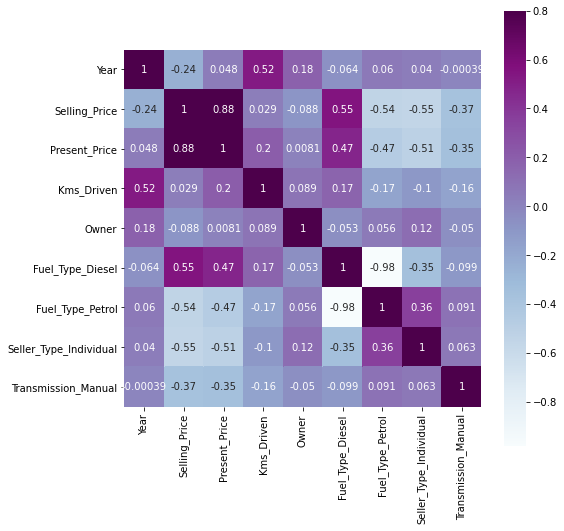

In [12]:
#correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, cmap='BuPu', annot=True);

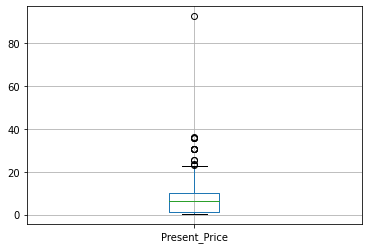

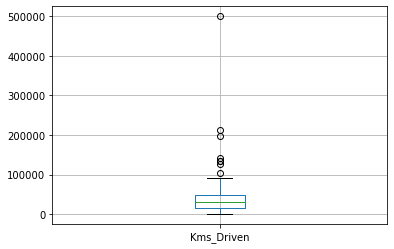

In [13]:
#outliers
for feature in ['Present_Price', 'Kms_Driven']:
    df.boxplot(column=feature)
    plt.show()

In [14]:
#handling outliers
#since the features are not normally distributed I'll use IQR to handle outliers

#Present_Price
IQR = df.Present_Price.quantile(0.75) - df.Present_Price.quantile(0.25)
Lower_range = df.Present_Price.quantile(0.25) - (1.5*IQR)
Upper_range = df.Present_Price.quantile(0.75) + (1.5*IQR)

df['Present_Price'] = np.where(df['Present_Price']>22, 22, df['Present_Price'])

In [15]:
#Kms_Driven
IQR = df.Kms_Driven.quantile(0.75) - df.Kms_Driven.quantile(0.25)
Lower_range = df.Kms_Driven.quantile(0.25) - (1.5*IQR)
Upper_range = df.Kms_Driven.quantile(0.75) + (1.5*IQR)

df['Kms_Driven'] = np.where(df['Kms_Driven']>99417, 99417, df['Kms_Driven'])

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,7.372093,4.661296,7.027043,34426.604651,0.043189,0.199336,0.794020,0.352159,0.867110
std,2.891554,5.082812,6.036895,23726.404945,0.247915,0.400166,0.405089,0.478439,0.340021
min,3.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,7.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,9.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,18.000000,35.000000,22.000000,99417.000000,3.000000,1.000000,1.000000,1.000000,1.000000


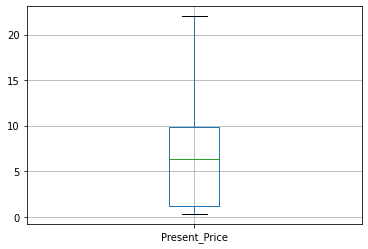

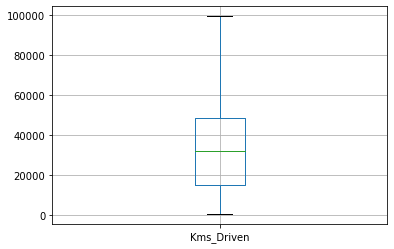

In [17]:
#checking outliers again
for feature in ['Present_Price', 'Kms_Driven']:
    df.boxplot(column=feature)
    plt.show()

In [18]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

features_to_scale=[feature for feature in df.columns if feature not in ['Selling_Price']]
scaler.fit(df[features_to_scale])

df = pd.concat([df[['Selling_Price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[features_to_scale]), columns=features_to_scale)],
                    axis=1)

In [19]:
df.head()

,Selling_Price,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,0.266667,0.243081,0.267901,0.0,0.0,1.0,0.0,1.0
1,4.75,0.333333,0.425277,0.429653,0.0,1.0,0.0,0.0,1.0
2,7.25,0.066667,0.439576,0.064701,0.0,0.0,1.0,0.0,1.0
3,2.85,0.466667,0.176661,0.047515,0.0,0.0,1.0,0.0,1.0
4,4.60,0.266667,0.302122,0.424093,0.0,1.0,0.0,0.0,1.0


In [20]:
df.describe()

,Selling_Price,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,0.291473,0.309365,0.342981,0.014396,0.199336,0.794020,0.352159,0.867110
std,5.082812,0.192770,0.278455,0.239862,0.082638,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,0.133333,0.040590,0.146588,0.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,0.266667,0.280443,0.318449,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,0.400000,0.441882,0.487955,0.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#splitting dataset
from sklearn.model_selection import train_test_split

X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [25]:
#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

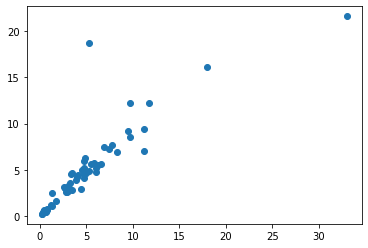

In [26]:
plt.scatter(y_test,y_pred)

In [27]:
#score
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9614098360655741
MSE: 5.911468504918034
RMSE: 2.4313511685723297


In [28]:
import pickle
# open a file, where you ant to store the data
file = open('feature_scaling_model.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)